# COMPARITIVE STUDY FOR DRIVER'S DROWSINESS DETECTION 

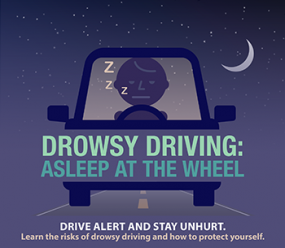

### Aim:
Our project aims at providing a solution for sleepness dtection while driver is on the wheel. As we know, sleeping while driving is very dangerous not only for the driver, but also for others. Neumerous accident cases have been reported due to the driver falling asleep while driving for maybe even a second. 

### Project flow:
    We have implemented our project using:
        1. Basic CNN model using np array's from scratch. 
        2. BasiC CNN model using keras. 
        3. VGG 16 model using keras. 
    Our project contains 3 ipynb files: 
        1. Basic CNN file using np array's from scratch.
        2. BasiC CNN model using keras
            2a. CNN code for training data
            2b. CNN code for the testing data 
        3.  VGG 16 model 
            3a. VGG16 code code for training data
            3b. VGG16 code code for testing data

### This file contains the code that will help us to TRAIN and TEST our model using VGG16 

### Importing pacakges

In [9]:
import os #helps in providing functions to import with the oeprating system
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np #used to perform opertaions on arrays 
from glob import glob
import matplotlib.pyplot as plt #helps in creating vizualizations in python
import tensorflow as tf
from keras.models import load_model
import matplotlib as  plot

In [10]:
#  Mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Preprocessing the data

In [14]:
# re-size all the images to 224 x 224 
Img_size = [224, 224]

In [15]:
#trn_data = '/content/gdrive/MyDrive/dataset/dataset_eye/train' #location where we have to get the train data from
#vld_data = '/content/gdrive/MyDrive/dataset/dataset_eye/test' #location where we have to get the test data from

In [16]:
# Preprocessin the images
from keras.preprocessing.image import ImageDataGenerator

train_split = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) #Taking the train dataset, preprocessing it by, rescaling, zooming and flipping the data.

tst_split = ImageDataGenerator(rescale = 1./255)  #Taking the test dataset and preprocessing it.



In [17]:
trn_data = train_split.flow_from_directory('/content/gdrive/MyDrive/dataset/dataset_eye/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') #splitting the train data

tst_data = tst_split.flow_from_directory('/content/gdrive/MyDrive/dataset/dataset_eye/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical') #splitting the test data

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


### Model implementation

In [18]:
#Implementing vgg model
vgg_model = VGG16(input_shape=Img_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for prep_layer in vgg_model.layers:
  prep_layer.trainable = False
  


58900480/58889256 [==============================] - 0s 0us/step


In [19]:
#getting the number of class labels and their location
number_of_items = glob('/content/gdrive/MyDrive/dataset/dataset_eye/train/*')
print("Number of folders,\n",number_of_items)

Number of folders,
 ['/content/gdrive/MyDrive/dataset/dataset_eye/train/Open', '/content/gdrive/MyDrive/dataset/dataset_eye/train/Closed']


In [20]:
#Flattening the final hiddden layer to get the output layer
lay_1 = Flatten()(vgg_model.output)
prediction = Dense(len(number_of_items), activation='softmax')(lay_1)
# create a model object
obj_model = Model(inputs=vgg_model.input, outputs=prediction)


In [21]:
# view the structure of the model
obj_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
#compiling the model object by defining what loss method and optimizer we have to use 
obj_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Running epochs

In [28]:
epoch_number = 10
trn_stp=trn_data.n//trn_data.batch_size
val_stp =tst_data.n//tst_data.batch_size

In [29]:
print("Steps taken for the train data\n",trn_stp)
print("Steps taken for the test data\n",val_stp)

Steps taken for the train data
 38
Steps taken for the test data
 6


In [30]:
# fitting the model
r = obj_model.fit_generator(
  trn_data,
  validation_data=tst_data,
  epochs=10,
  steps_per_epoch=len(trn_data),
  validation_steps=len(tst_data)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
39/39 [==============================] - 27s 690ms/step - loss: 0.1262 - accuracy: 0.9571 - val_loss: 0.1407 - val_accuracy: 0.9679
Epoch 2/10
39/39 [==============================] - 27s 698ms/step - loss: 0.0988 - accuracy: 0.9700 - val_loss: 0.1117 - val_accuracy: 0.9541
Epoch 3/10
39/39 [==============================] - 27s 683ms/step - loss: 0.0770 - accuracy: 0.9749 - val_loss: 0.0934 - val_accuracy: 0.9587
Epoch 4/10
39/39 [==============================] - 27s 681ms/step - loss: 0.0722 - accuracy: 0.9773 - val_loss: 0.1350 - val_accuracy: 0.9495
Epoch 5/10
39/39 [==============================] - 27s 681ms/step - loss: 0.0705 - accuracy: 0.9757 - val_loss: 0.0884 - val_accuracy: 0.9633
Epoch 6/10
39/39 [==============================] - 27s 687ms/step - loss: 0.0703 - accuracy: 0.9708 - val_loss: 0.0938 - val_accuracy: 0.9633
Epoch 7/10
39/39 [==============================] - 27s 688ms/step - loss: 0.0498 - accuracy: 0.9870 - val_loss: 0.0816 - val_accuracy: 0.9725

### Vizualizing the loss and accuracy for our train and test set

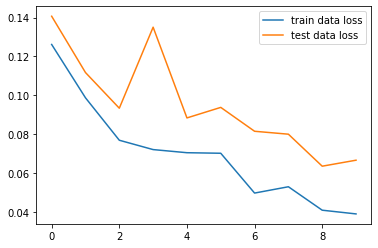

<Figure size 432x288 with 0 Axes>

In [31]:
# loss
plt.plot(r.history['loss'], label='train data loss')
plt.plot(r.history['val_loss'], label='test data loss')
plt.legend()
plt.show()
plt.savefig('loss_plot')


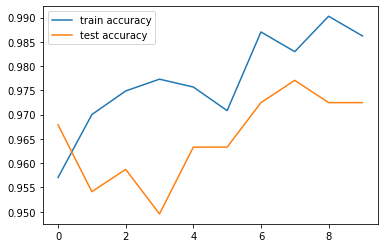

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_plot')

In [33]:
# Saving the model
obj_model.save('/content/gdrive/MyDrive/Group_9/Drowsiness_detection_vgg16.h5')

### Testing the Model

In [ ]:
mixer.init()
sound = mixer.Sound('C:/Users/lakshman/Desktop/Group_9/Group_9/alarm.wav') #contains the file the has helps in altering the driver by playing the sound
frontal_face = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_frontalface_alt.xml') #we test using haarcascade classifier that helps us to identify the frontal face of the user.
left_eye = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_lefteye_2splits.xml') #identify the left eye using haarcascade classifier
right_eye = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_righteye_2splits.xml') #identify the right eye using haarcascade classifier
basic_vgg_model = load_model('C:/Users/lakshman/Desktop/Group_9/Group_9/Drowsiness_detection_vgg16.h5') #loading the model we created previously

path = os.getcwd()
video_cap = cv2.VideoCapture(0) #capturing the video
font_name = cv2.FONT_HERSHEY_COMPLEX_SMALL #setting the font type
count=0  #setting tge count var
score=0 #setting the score initially to be zero 
var=2 
right_pred=[99] #initilzing the right and left pred 
left_pred=[99]

while(True):
    rectangle, draw = video_cap.read() #capturing the video in a frame
    hei,wid = draw.shape[:2]  #defining the height and width of frame

    gray = cv2.cvtColor(draw, cv2.COLOR_BGR2GRAY)
    
    faces = frontal_face.detectMultiScale(draw,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))  #creating the object to identify the frontalface 
    left_eyes = left_eye.detectMultiScale(draw) # identifying the left eye
    right_eyes =  right_eye.detectMultiScale(draw) #identifying the right eye 

    cv2.rectangle(draw, (0,hei-50) , (200,hei) , (0,0,0) , thickness=cv2.FILLED )
#identify the face dimensions from the rectangle, after which it identifies the right eye, does prediction whether right eye is closed or open. Similarly it does for the left eye as well. 
    for (l,b,w,h) in faces:
        cv2.rectangle(draw, (l,b) , (l+w,b+h) , (100,100,100) , 1 )

    for (l,b,w,h) in right_eyes:
        right_eye_capture=draw[b:b+h,l:l+w]
        count=count+1
        right_eye_capture = cv2.resize(right_eye_capture,(224,224))
        right_eye_capture= right_eye_capture/255
        right_eye_capture=  right_eye_capture.reshape(224,224,-1)
        right_eye_capture = np.expand_dims(right_eye_capture,axis=0)
        right_pred_1 = basic_vgg_model.predict(right_eye_capture)
        print("*******************************************************************************")
        print(right_pred_1)
        class_labels=['Closed','Open']
        right_pred = class_labels[right_pred_1.argmax()]
        print("*******************************************************************************")
        print(right_pred)
        if(right_pred=='Open'):
            class_labels='Open' 
        if(right_pred=='Closed'):
            class_labels='Closed'
        break

    for (l,b,w,h) in left_eyes:
        left_eye_capture=draw[b:b+h,l:l+w]
        count=count+1  
        left_eye_capture = cv2.resize(left_eye_capture,(224,224))
        left_eye_capture= left_eye_capture/255
        left_eye_capture=left_eye_capture.reshape(224,224,-1)
        left_eye_capture = np.expand_dims(left_eye_capture,axis=0)
        left_pred_1 = basic_vgg_model.predict(left_eye_capture)

        print("----------------------------------------------------------------------------------")
        print(left_pred_1)
        class_labels=['Closed','Open']
        left_pred = class_labels[left_pred_1.argmax()]
        print("----------------------------------------------------------------------------------")
        print(left_pred)
        if(left_pred=='Open'):
            class_labels='Open' 
        if(left_pred=='Closed'):
            class_labels='Closed' 
        break
        #if both eyes are closed, we increment the counter, and when closed score is 16, alarm is raised, where the "alarm.wav" sound is played. 
    if(right_pred=='Closed' and left_pred =='Closed'):
        score=score+1
        cv2.putText(draw,"Closed",(10,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    else:
        score=score-1
        cv2.putText(draw,"Open",(10,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(draw,'Score:'+str(score),(100,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        cv2.imwrite(os.path.join(path,'image.jpg'),draw)
        try:
            music_to_be_played.play()
        except: 
            pass
        if(var<16):
            var= var+2
        else:
            var=var-2
            if(var<2):
                var=2
        cv2.rectangle(draw,(0,0),(wid,hei),(0,0,255),var) 
    cv2.imshow('Realtime video detection for drowsiness detection using VGG16',draw)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_cap.release()
cv2.destroyAllWindows()

